# Reducing Loss

[Source](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture)

## 1. Iterative Approach

We'll use this same iterative approach throughout the Machine Learning Crash Course, detailing various complications, particularly within that stormy cloud labeled "Model (Prediction Function)." Iterative strategies are prevalent in machine learning, primarily because they scale so well to large data sets.

The "model" takes one or more features as input and returns one prediction as output. To simplify, consider a model that takes one feature and returns one prediction. We set initial values . For linear regression problems, it turns out that the starting values aren't important. We could pick random values.

At last, we've reached the "Compute parameter updates" part of the diagram. It is here that the machine learning system examines the value of the loss function and generates new values. For now, just assume that this mysterious box devises new values and then the machine learning system re-evaluates all those features against all those labels, yielding a new value for the loss function, which yields new parameter values. And the learning continues iterating until the algorithm discovers the model parameters with the lowest possible loss. Usually, you iterate until overall loss stops changing or at least changes extremely slowly. When that happens, we say that the model has converged.

## 2. Gradient Descent

In Machine Learning, we teach models to get better at making predictions. Think of a model like a person throwing darts at a dartboard. At first, the throws (or predictions) are inaccurate and miss the target. We want our model to hit the bullseye, or make accurate predictions.

### How it Works
1. **Start Somewhere:**
   Imagine you are predicting the duration of tennis matches without any prior knowledge. You start by making a prediction for the duration of each match in the `tennis02.csv` file.

2. **Get Feedback: Gradient:**
   Once you make initial predictions, you need to know how accurate or off they are. In the context of the tennis match durations, you compare your predicted durations against the actual durations to see the difference. This difference, or error, is what you want to minimize.

   In machine learning, this error is quantified and represented by the "gradient." The gradient is like a compass, pointing in the direction where the error is increasing the most rapidly. It tells us two crucial pieces of information:
   - **Direction:** Which way to adjust our predictions to reduce error.
   - **Magnitude:** How big the error is, indicating how 'off' our predictions are.

   By understanding the gradient, we can adjust our model's predictions in the opposite direction to where the gradient is pointing, effectively reducing the error. This feedback loop of making predictions, evaluating the gradient, and adjusting accordingly is a core component of training machine learning models to make accurate predictions.


3. **Adjust Your Predictions:**
   Based on the feedback, you adjust your next set of predictions to be closer to the actual durations. In machine learning, this adjustment is done to the model's "parameters" to make better predictions. The amount of adjustment is determined by the "learning rate," akin to choosing how big of a step to take when adjusting your throw.

4. **Repeat:**
   You keep adjusting your predictions based on feedback until they are very close to the actual durations or until a certain condition is met, like hitting the bullseye in darts. In machine learning, this process is repeated to continually refine the model until it makes good predictions.


### Learning Rate
The learning rate is like deciding how big of a step to take when adjusting. If you take too big of a step, you might overshoot and miss the target. If you take tiny steps, it might take a very long time to reach the target, or you might get stuck and never reach it.

### Types of Gradient Descent
- **Batch Gradient Descent:**
   Like considering advice from all your friends at once when adjusting your throw.
   
- **Stochastic Gradient Descent (SGD):**
   Like considering advice from only one friend at a time. It’s usually quicker but can be less accurate.
   
- **Mini-Batch Gradient Descent:**
   Like considering advice from a small group of friends. It’s a middle ground between considering everyone and just one friend.

### Simplified Explanation
Gradient Descent is like learning to throw darts blindfolded. You start somewhere, get feedback on how off you are, adjust your throw based on the feedback, and repeat until you are close to the bullseye. How you adjust and whose advice you consider (yours alone, everyone’s, or a small group's) can vary, affecting how quickly and accurately you learn to hit the target.


Iteration (0,), Loss: 19298.57, Slope: 0.56, Intercept: 2.72
Iteration (100,), Loss: 349.62, Slope: 24.49, Intercept: 118.32
Iteration (200,), Loss: 16.35, Slope: 27.66, Intercept: 133.66
Iteration (300,), Loss: 10.49, Slope: 28.08, Intercept: 135.69
Iteration (400,), Loss: 10.39, Slope: 28.14, Intercept: 135.96
Iteration (500,), Loss: 10.38, Slope: 28.14, Intercept: 135.99
Converged after 508 iterations
Final Slope: 28.14, Final Intercept: 136.0, Final Loss: 10.38


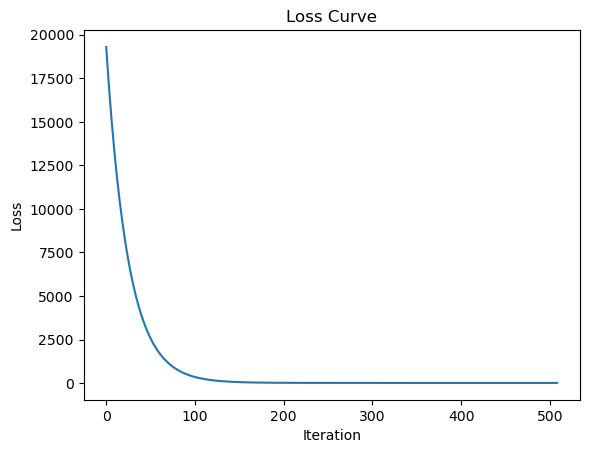

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
filename = 'tennis02.csv'
data = pd.read_csv(filename)

# Extract features and target variable
X = data['Actual Duration'].values
y = data['Predicted Duration'].values

# Normalize the feature
X = (X - X.mean()) / X.std()

# Initialize parameters
slope = 0  # analogous to m in y = mx + b
intercept = 0  # analogous to b in y = mx + b
learning_rate = 0.01  # smaller learning rate
previous_loss = float('inf')
tolerance = 1e-6  # stops the iteration when the change in loss is below this value

# To store the loss values for each iteration
losses = []

# Iterate until convergence
for i in range(10000):  # maximum of 10000 iterations
    # Make predictions
    predictions = slope * X + intercept
    
    # Compute Mean Squared Error (MSE) Loss
    loss = ((predictions - y) ** 2).mean()
    losses.append(loss)  # append the current loss to the list
    
    # Check for convergence
    if abs(previous_loss - loss) < tolerance:
        print(f'Converged after {i} iterations')
        break
    
    # Update previous loss
    previous_loss = loss
    
    # Compute gradients
    gradient_slope = (2 * (predictions - y) * X).mean()
    gradient_intercept = (2 * (predictions - y)).mean()
    
    # Update parameters
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept
        
    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f'Iteration {i,}, Loss: {round(loss, 2)}, Slope: {round(slope, 2)}, Intercept: {round(intercept, 2)}')

        # Final parameters
print(f'Final Slope: {round(slope, 2)}, Final Intercept: {round(intercept, 2)}, Final Loss: {round(loss, 2)}')

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

The given results illustrate the iterative process of training a linear model using gradient descent, where the model is trying to fit the best possible line to the given data points from the 'tennis02.csv' file. Here’s a breakdown of the results:

### Iteration 0:
- **Loss:** 19298.57
- **Slope:** 0.56
- **Intercept:** 2.72

At the start (iteration 0), the model begins with an initial guess for the slope and intercept, leading to a very high loss value of 19298.57, indicating a poor fit to the data.

### Iteration 100:
- **Loss:** 349.62
- **Slope:** 24.49
- **Intercept:** 118.32

By iteration 100, the model has significantly improved, with the loss reduced to 349.62, and the slope and intercept adjusted to better fit the data.

### Iteration 200 to 500:
- The model continues to refine the slope and intercept, further reducing the loss.
- By iteration 500, the loss has decreased to approximately 10.38, indicating a good fit to the data.

### Convergence:
- The model converges after 508 iterations, meaning further iterations do not significantly improve the model.
- **Final Slope:** 28.14
- **Final Intercept:** 135.99
- **Final Loss:** 10.38

The final slope and intercept represent the parameters of the line that best fits the data according to the linear model, and the final loss represents how well the model fits the data; a lower loss indicates a better fit.

Let's see now a bigger dataset:

Iteration (0,), Loss: 26750.51, Slope: 0.14, Intercept: 3.17
Iteration (100,), Loss: 2011.63, Slope: 6.08, Intercept: 137.93
Iteration (200,), Loss: 1576.53, Slope: 6.86, Intercept: 155.8
Iteration (300,), Loss: 1568.87, Slope: 6.97, Intercept: 158.17
Iteration (400,), Loss: 1568.74, Slope: 6.98, Intercept: 158.49
Iteration (500,), Loss: 1568.74, Slope: 6.98, Intercept: 158.53
Converged after 514 iterations
Final Slope: 6.98, Final Intercept: 158.53, Final Loss: 1568.74


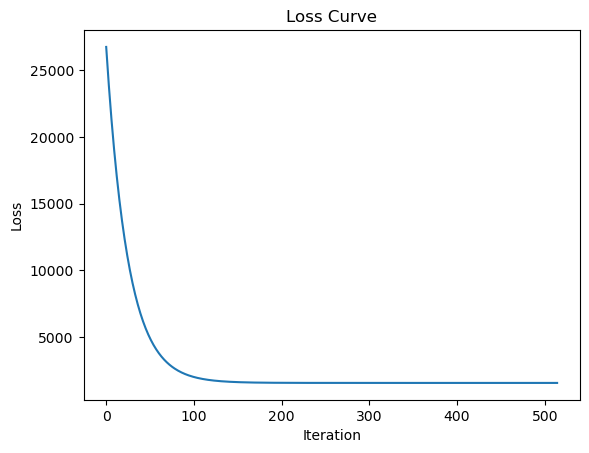

In [22]:
# Load the dataset
filename = 'tennis.csv'
data = pd.read_csv(filename)

# Extract features and target variable
X = data['Actual Duration'].values
y = data['Predicted Duration'].values

# Normalize the feature
X = (X - X.mean()) / X.std()

# Initialize parameters
slope = 0  # analogous to m in y = mx + b
intercept = 0  # analogous to b in y = mx + b
learning_rate = 0.01  # smaller learning rate
previous_loss = float('inf')
tolerance = 1e-6  # stops the iteration when the change in loss is below this value

# To store the loss values for each iteration
losses = []

# Iterate until convergence
for i in range(10000):  # maximum of 10000 iterations
    # Make predictions
    predictions = slope * X + intercept
    
    # Compute Mean Squared Error (MSE) Loss
    loss = ((predictions - y) ** 2).mean()
    losses.append(loss)  # append the current loss to the list
    
    # Check for convergence
    if abs(previous_loss - loss) < tolerance:
        print(f'Converged after {i} iterations')
        break
    
    # Update previous loss
    previous_loss = loss
    
    # Compute gradients
    gradient_slope = (2 * (predictions - y) * X).mean()
    gradient_intercept = (2 * (predictions - y)).mean()
    
    # Update parameters
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept
        
    # Print progress every 100 iterations
    if i % 100 == 0:
        print(f'Iteration {i,}, Loss: {round(loss, 2)}, Slope: {round(slope, 2)}, Intercept: {round(intercept, 2)}')

        # Final parameters
print(f'Final Slope: {round(slope, 2)}, Final Intercept: {round(intercept, 2)}, Final Loss: {round(loss, 2)}')

# Plotting the loss curve
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

The provided results depict the progression of a linear model being trained using gradient descent. Below is a detailed breakdown of the results:

### Iteration 0:
- **Loss:** 26750.51
- **Slope:** 0.14
- **Intercept:** 3.17

At the outset (iteration 0), the model starts with initial guesses for the slope and intercept, resulting in a high loss value of 26750.51, indicating a poor fit to the data.

### Iteration 100:
- **Loss:** 2011.63
- **Slope:** 6.08
- **Intercept:** 137.93

By iteration 100, the model has made substantial improvements, with the loss reduced to 2011.63, and the slope and intercept adjusted to better fit the data.

### Iteration 200 to 500:
- The model continues to refine the slope and intercept, further reducing the loss.
- By iteration 500, the loss has decreased to approximately 1568.74, indicating a good fit to the data.

### Convergence:
- The model converges after 514 iterations, meaning further iterations do not significantly improve the model.
- **Final Slope:** 6.98
- **Final Intercept:** 158.53
- **Final Loss:** 1568.74

The final slope and intercept represent the parameters of the line that best fits the data according to the linear model, and the final loss represents how well the model fits the data; a lower loss indicates a better fit.
